In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import glob # To read all csv files in the directory
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support

In [2]:
#Creating a DataFrame by combining the all the CSV files into one and reading the data
data_frame = pd.concat([pd.read_csv(f) for f in glob.glob('C:/Users/jayap/Desktop/Mrudani/Individual project/Kickstarter_2019-02-14T03_20_04_734Z/Kickstarter*.csv')], ignore_index = True)

In [3]:
data_frame.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,4,Handmade glass trees that make a special Chris...,"{""id"":347,""name"":""Glass"",""slug"":""crafts/glass""...",205,US,1464927602,"{""id"":661261267,""name"":""Mark & Julie Glocke"",""...",USD,$,True,...,glass-christmas-trees-and-glass-cross,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466474764,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",205.000000,domestic
1,171,Perfect pair of Socks for any Adventurer! Sock...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",6061,US,1540391660,"{""id"":497057119,""name"":""Andy ""Cosmo-Joe"" Watki...",USD,$,True,...,socks-of-speed-and-socks-of-elvenkind,https://www.kickstarter.com/discover/categorie...,True,False,successful,1542304740,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6061.000000,international
2,9,This is a Series of 6 Books on Blessed Oscar A...,"{""id"":327,""name"":""Translations"",""slug"":""publis...",800,US,1434584826,"{""id"":267701790,""name"":""Convivium Press"",""slug...",USD,$,True,...,the-complete-homilies-of-blessed-oscar-romero-...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1439741591,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",800.000000,domestic
3,24,Prodeus makes self employment simple and intui...,"{""id"":342,""name"":""Web"",""slug"":""technology/web""...",1484,US,1493997043,"{""id"":973039847,""name"":""James Harr"",""is_regist...",USD,$,True,...,prodeus-social-network-learning-community-micr...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1498060876,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1484.000000,domestic
4,62,"Welcome to Dungeon Corp LTD, a Dungeons and Dr...","{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",1066,ES,1544546012,"{""id"":496847178,""name"":""Eternalverse"",""slug"":""...",EUR,€,False,...,dungeon-corp-ltd-the-adventures-of-bob-and-tim,https://www.kickstarter.com/discover/categorie...,False,True,live,1547165608,1.155864,"{""web"":{""project"":""https://www.kickstarter.com...",1087.667629,domestic


In [4]:
len(data_frame)

208474

In [5]:
data_frame.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [6]:
#dropping the unnecessary columns which has most values as NULL and the values not useful for the machine learning algorithm
data_frame.drop(['friends', 'is_backing', 'is_starred', 'permissions','converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'state_changed_at', 'urls', 'usd_type'], axis=1, inplace=True)

In [7]:
#converting the unix timestamp in the dataframe to 'datatime' format
unix_ts_to_date_time = ['created_at', 'deadline', 'launched_at']
for column in unix_ts_to_date_time:
    data_frame[column] = pd.to_datetime(data_frame[column], origin='unix', unit='s')

In [8]:
#Data Frame after converting the timestamps from Unix to 'Datetime' format
data_frame.head()

,backers_count,blurb,category,country,created_at,deadline,disable_communication,goal,id,is_starrable,launched_at,location,name,staff_pick,state,static_usd_rate,usd_pledged
0,4,Handmade glass trees that make a special Chris...,"{""id"":347,""name"":""Glass"",""slug"":""crafts/glass""...",US,2016-06-03 04:20:02,2016-06-21 02:06:00,False,1000.0,1145008426,False,2016-06-04 02:31:55,"{""id"":2508897,""name"":""Turtle Lake"",""slug"":""tur...",Glass Christmas Trees & Glass Cross,False,failed,1.000000,205.000000
1,171,Perfect pair of Socks for any Adventurer! Sock...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",US,2018-10-24 14:34:20,2018-11-15 17:59:00,False,2000.0,1687733153,False,2018-10-30 20:00:02,"{""id"":2449378,""name"":""Menasha"",""slug"":""menasha...",Socks of Speed and Socks of Elvenkind,False,successful,1.000000,6061.000000
2,9,This is a Series of 6 Books on Blessed Oscar A...,"{""id"":327,""name"":""Translations"",""slug"":""publis...",US,2015-06-17 23:47:06,2015-08-16 16:13:11,False,4400.0,1608693208,False,2015-07-07 16:13:11,"{""id"":2450022,""name"":""Miami"",""slug"":""miami-fl""...",The Complete Homilies of Blessed Oscar Romero:...,False,failed,1.000000,800.000000
3,24,Prodeus makes self employment simple and intui...,"{""id"":342,""name"":""Web"",""slug"":""technology/web""...",US,2017-05-05 15:10:43,2017-06-21 16:01:16,False,50000.0,66308869,False,2017-05-22 16:01:16,"{""id"":12589335,""name"":""Brooklyn"",""slug"":""brook...",Prodeus: The Future of Work & Learning,False,failed,1.000000,1484.000000
4,62,"Welcome to Dungeon Corp LTD, a Dungeons and Dr...","{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",ES,2018-12-11 16:33:32,2019-02-15 00:13:28,False,700.0,654590050,False,2019-01-11 00:13:28,"{""id"":777341,""name"":""Vigo"",""slug"":""vigo-vigo-e...",Dungeon Corp LTD.: The Adventures of Bob and Tim.,True,live,1.155864,1087.667629


In [9]:
#As the project description will not be used to analyze any text content, we are converting it into description 
#length by adding a new column for it
data_frame['blurb_length'] = data_frame['blurb'].str.split().str.len()

#Removing the project description column
data_frame.drop('blurb', axis=1, inplace=True)

In [10]:
# Extracting the categories and the sub-categories of each project to be used in training the model
# The categories are extracted from the Category column in the Data Frame
data_frame.iloc[0]['category']
categories = lambda x: x['category'].split('/')[1].split('","position')[0]
data_frame['sub_category'] = data_frame.apply(categories, axis=1)

categories = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
data_frame['category'] = data_frame.apply(categories, axis=1)
categories = lambda x: x['category'].split('","position"')[0] 
data_frame['category'] = data_frame.apply(categories, axis=1)

In [11]:
# Since the initial promised funding for each prject is mentioned in different currencies, we are converting all
#into USD for better training of the model
data_frame.drop('disable_communication', axis=1, inplace=True)
data_frame['usd_goal'] = round(data_frame['goal'] * data_frame['static_usd_rate'],2)
data_frame.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

In [12]:
data_frame.drop('location', axis=1, inplace=True)

In [13]:
# Similar to description length, we are converting the name column to length by adding a new column name_length
#and removing the existing 'name' column from the dataframe
data_frame['name_length'] = data_frame['name'].str.split().str.len()
# Drop name variable
data_frame.drop('name', axis=1, inplace=True)

In [14]:
#Rounding off the funding amount to 3 decimal places
data_frame['usd_pledged'] = round(data_frame['usd_pledged'],3)

In [15]:
#Time between creating and launching a project and rounding off to the nearest number of days
data_frame['time_taken_to_launch'] = data_frame['launched_at'] - data_frame['created_at']
data_frame['time_taken_to_launch'] = data_frame['time_taken_to_launch'].dt.round('d').dt.days 

In [16]:
#calculating the mean amount granted per backer for each project
data_frame['mean_amount_per_backer'] = round(data_frame['usd_pledged']/data_frame['backers_count'],2)

In [17]:
data_frame.blurb_length.fillna(0, inplace=True)

In [18]:
#Since the projects mentioned in the data have different states such as 'Successfull', 'failed', 'cancelled'
#'Live', and 'suspended', we are only considering the states of 'success' and 'failure' for better model training
data_frame = data_frame[data_frame['state'].isin(['successful', 'failed'])]

In [19]:
#Removing all the duplicates from the data and keeping only the unique data
data_frame.drop_duplicates(inplace=True)

In [20]:
print("The number rows in the dataset after removing the duplicates are " + str(len(data_frame)))

The number rows in the dataset after removing the duplicates are 168741


In [21]:
data_frame.set_index('id', inplace=True)

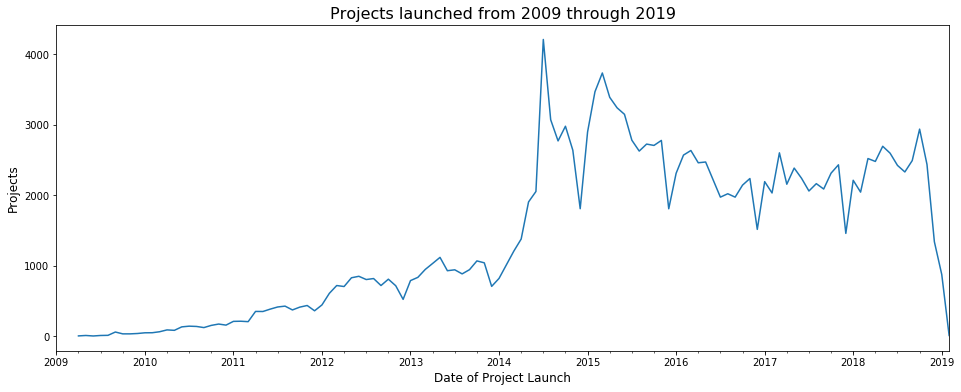

In [22]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
data_frame.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-28', '2019-02-01') # Limiting to whole months
plt.xlabel('Date of Project Launch', fontsize=12)
plt.ylabel('Projects', fontsize=12)
plt.title('Projects launched from 2009 through 2019', fontsize=16)
plt.show()

In [23]:
# Dropping columns and creating new dataframe
transformed_data = data_frame.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category', 'mean_amount_per_backer'], axis=1)
transformed_data.head()

,category,country,staff_pick,state,blurb_length,usd_goal,name_length,time_taken_to_launch
id,,,,,,,,
1145008426,crafts,US,False,failed,22.0,1000.0,6,1
1687733153,games,US,False,successful,14.0,2000.0,7,6
1608693208,publishing,US,False,failed,25.0,4400.0,9,20
66308869,technology,US,False,failed,16.0,50000.0,7,17
227936657,comics,GB,False,successful,24.0,3901.5,8,12


In [24]:
#Converting the results of projects 'success' to 1 and 'failure' to 0 which would be fed to the machine learning
#algorithm
transformed_data['state'] = transformed_data['state'].replace({'failed': 0, 'successful': 1})

# Creating dummy variables
transformed_data['staff_pick'] = transformed_data['staff_pick'].astype(str)
transformed_data = pd.get_dummies(transformed_data)
transformed_data.columns

Index(['state', 'blurb_length', 'usd_goal', 'name_length',
       'time_taken_to_launch', 'category_art', 'category_comics',
       'category_crafts', 'category_dance', 'category_design',
       'category_fashion', 'category_film & video', 'category_food',
       'category_games', 'category_journalism', 'category_music',
       'category_photography', 'category_publishing', 'category_technology',
       'category_theater', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US',
       'staff_pick_False', 'staff_pick_True'],
      dtype='object')

In [25]:
#Transforming the data into X and y i.e. dependent and independent variables and scaling the data
X = transformed_data.drop('state', axis=1)
y = transformed_data.state
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,blurb_length,usd_goal,name_length,time_taken_to_launch,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,...,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,staff_pick_False,staff_pick_True
0,0.596046,-0.036100,0.107456,-0.358990,-0.345042,-0.196935,5.475801,-0.134971,-0.190162,-0.235519,...,-0.015965,-0.099403,-0.0931,-0.048439,-0.066862,-0.079922,-0.053299,0.614355,0.382918,-0.382918
1,-1.017775,-0.035200,0.476740,-0.319698,-0.345042,-0.196935,-0.182622,-0.134971,-0.190162,-0.235519,...,-0.015965,-0.099403,-0.0931,-0.048439,-0.066862,-0.079922,-0.053299,0.614355,0.382918,-0.382918
2,1.201228,-0.033040,1.215309,-0.209681,-0.345042,-0.196935,-0.182622,-0.134971,-0.190162,-0.235519,...,-0.015965,-0.099403,-0.0931,-0.048439,-0.066862,-0.079922,-0.053299,0.614355,0.382918,-0.382918
3,-0.614320,0.007987,0.476740,-0.233256,-0.345042,-0.196935,-0.182622,-0.134971,-0.190162,-0.235519,...,-0.015965,-0.099403,-0.0931,-0.048439,-0.066862,-0.079922,-0.053299,0.614355,0.382918,-0.382918
4,0.999501,-0.033489,0.846025,-0.272548,-0.345042,5.077823,-0.182622,-0.134971,-0.190162,-0.235519,...,-0.015965,-0.099403,-0.0931,-0.048439,-0.066862,-0.079922,-0.053299,-1.627722,0.382918,-0.382918


In [26]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)

In [35]:
# Using Logistic regression classifier
clf = LogisticRegression(solver='lbfgs',multi_class='ovr')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
# y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62     22308
           1       0.70      0.81      0.75     28315

   micro avg       0.70      0.70      0.70     50623
   macro avg       0.70      0.69      0.69     50623
weighted avg       0.70      0.70      0.70     50623



In [37]:
cf = confusion_matrix(y_test, y_pred)
print("The confusion matrix is: ")
print(cf)

The confusion matrix is: 
[[12469  9839]
 [ 5256 23059]]


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7018153803607056

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=1000,max_depth=4)
clf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
y_pred_2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.76      0.49      0.60     22308
           1       0.69      0.88      0.77     28315

   micro avg       0.71      0.71      0.71     50623
   macro avg       0.72      0.69      0.68     50623
weighted avg       0.72      0.71      0.69     50623



In [65]:
cf = confusion_matrix(y_test, y_pred_2)
print("The confusion matrix is: ")
print(cf)

The confusion matrix is: 
[[11005 11303]
 [ 3478 24837]]


In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_2)

0.7080180945420066